In [26]:
# Azure의 Custom Vision 라이브러리를 추가. 예측을 위하여 prediction을 포함
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
# OpenAPI 스펙에 맞춰서 Authentication을 처리할 수 있도록 해주는 코드
from msrest.authentication import ApiKeyCredentials
# Matplotlib의 pyplot을 포함하여 예측 결과를 그리기
from matplotlib import pyplot as plt
# Python Image 라이브러리로 이미지 그리기
from PIL import Image, ImageDraw, ImageFont
# Python Numpy (수학 및 과학 연산 패키지) 포함
import numpy as np
# 파일 처리 작업을 위해 os 라이브러리 포함
import os

In [ ]:
# 사용자가 만든 AI 모델의 예측 기능을 사용하기 위한 endpoint 지정
prediction_endpoint = ''
# KEY 값 지정
prediction_key = ''
# 프로젝트 ID 지정
project_id = ''
# 모델명 지정
model_name = ''

In [28]:
# 앞에서 지정한 API KEY를 이용하여, 접속을 위한 credential 인스턴스 생성
credentials = ApiKeyCredentials(in_headers={"Prediction-key": prediction_key})
# endpoint 및 credential을 이용하여 predictor 인스턴스 생성
predictor = CustomVisionPredictionClient(endpoint=prediction_endpoint, credentials=credentials)

In [29]:
# 테스트 이미지를 Codespace workspace에 추가한 후 image_file 변수로 지정
image_file = "./data/test-1.png"
# 이미지 파일 이름 출력
print('Detecting objects in ', image_file)
# Python Imaging Library의 image open함수를 써서 테스트 이미지 파일 오픈
image = Image.open(image_file)
# Numpy에서 이미지의 shape(높이, 폭, 채널) 읽기
h, w, ch = np.array(image).shape

Detecting objects in  ./data/test-1.png


In [ ]:
with open(image_file, mode="rb") as image_data:
    results = predictor.detect_image(project_id, model_name, image_data)

for prediction in results.predictions:
    print("\t" + prediction.tag_name + \
          ": {0:.2f}% bbox.left = {1:.2f}, bbox.top = {2:.2f}, bbox.width = {3:.2f}, bbox.height = {4:.2f}".format(prediction.probability * 100, \
          prediction.bounding_box.left, prediction.bounding_box.top, prediction.bounding_box.width, prediction.bounding_box.height))

	Bungee: 99.31% bbox.left = 0.02, bbox.top = 0.36, bbox.width = 0.72, bbox.height = 0.57
	Bungee: 28.74% bbox.left = 0.04, bbox.top = 0.21, bbox.width = 0.64, bbox.height = 0.79
	Bungee: 27.50% bbox.left = 0.01, bbox.top = 0.00, bbox.width = 0.12, bbox.height = 0.67
	Bungee: 3.78% bbox.left = 0.58, bbox.top = 0.39, bbox.width = 0.42, bbox.height = 0.61
	Bungee: 2.56% bbox.left = 0.03, bbox.top = 0.08, bbox.width = 0.47, bbox.height = 0.92


Results saved in output.jpg


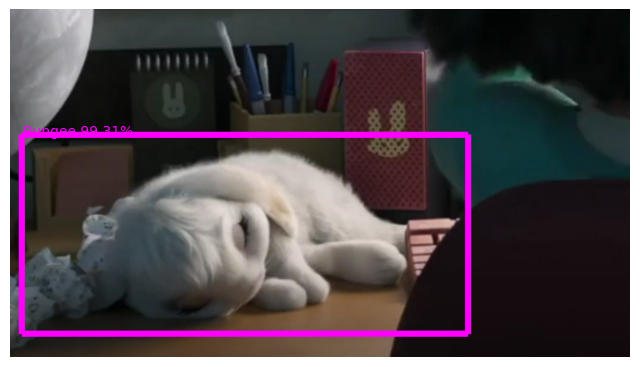

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.axis('off')

draw = ImageDraw.Draw(image)
lineWidth = int(w/100)
color = 'magenta'

for prediction in results. predictions:

    if (prediction.probability*100) > 50:
        left = prediction.bounding_box.left * w
        top = prediction.bounding_box.top * h
        width = prediction.bounding_box.width * w
        height = prediction.bounding_box.height * h

        points = ((left,top), (left+width,top), (left+width,top+height), (left,top+height),(left,top))
        draw.line(points, fill=color, width=lineWidth)
        plt.annotate(prediction.tag_name + ' {0:.2f}%'.format(prediction.probability * 100), (left, top), color=color)
        
plt.imshow(image)
outputfile = 'output.jpg'
fig. savefig(outputfile)
print('Results saved in', outputfile)